# 検定

## 統計的仮説検定

**帰無仮説**（null hypothesis）$H_0$と**対立仮説**（alternative hypothesis）$H_1$という2つの排反な仮説を設定し、両者の仮説のどちらを受容するかをデータから判定していく。

例えば、母集団の確率分布を$f(x|\theta)$としたときに

$$
H_0: \theta = \theta_0
\text{ vs }
H_1: \theta \neq \theta_0
$$

のように帰無仮説と対立仮説を設定する。

:::{margin}
なお、対立仮説が$\theta \neq \theta_0$のときは$\theta > \theta_0$と$\theta < \theta_0$と両側に棄却域をもつため**両側検定**（two-sided test）という。

また$\theta > \theta_0$のような対立仮説のときは**片側検定**（one-sided test）という。
:::

### 仮説検定方式

標本空間$\mathcal{X}$を、$H_0$の

- **棄却域**（rejection region）$R = \{x \in \mathcal{X} | H_0 を棄却する \}$
- **受容域**（acceptance region）$A = \{x \in \mathcal{X} | H_0 を受容する \}$

とに分割するルールのことを**仮説検定方式**（hypothesis testing procedure）という。

また標本$X_1,\dots,X_n$に基づいた統計量$T=T(X_1,\dots,X_n)$によって$R$と$A$が定まるとき、$T$を**検定統計量**（test statistic）という。


### 有意水準

もし帰無仮説を棄却したとき、その判断が間違っている可能性をコントロールしたい。
そこで、帰無仮説$H_0$が正しいにも関わらず誤って$H_0$を棄却してしまう確率がすべての$\theta \in \Theta_0$に対して$\alpha$以下になるようにするという条件

$$
\sup_{\theta \in \Theta_0} P_{\theta} (\boldsymbol{X} \in R) \leq \alpha
$$

を満たすように棄却域を調整する。この$\alpha$を**有意水準**（significance leve）という。

ここで$\Theta_0$はパラメータ$\theta$のとりうる値の集合である**母数空間**（parameter space）$\Theta$のうち帰無仮説に対応するものである（例えば$\Theta_0 = \{ \theta | \theta = \theta_0 \}$）


:::{card} **（例）**
例えば、標本平均がある値$\mu_0$と等しいかどうかを検定したいとする。

$$
H_0: \mu = \mu_0 \text{ vs } H_1: \mu \neq \mu_0
$$

という両側検定は、適当な定数$C$を使って、

- $|\bar{X} - \mu_0| > C$ならば$H_0$を棄却する
- $|\bar{X} - \mu_0| \leq C$ならば$H_0$を受容する

と書き換えることができる。この場合、$|\bar{X} - \mu_0|$が検定統計量となり、$H_0$の棄却域は

$$
R = \big\{ x \in \mathcal{X} \ \big|\ |\bar{X} - \mu_0| > C \big\}
$$

となる。

有意水準が$\alpha$になるよう$C$を調整する場合、

$$
P_{\mu = \mu_0}( |\bar{X} - \mu_0| > C) = \alpha
$$

となるような$C$にすることになる。

$Z = \sqrt{n} (\bar{X} - \mu_0) / \sigma$とすると、帰無仮説$\mu = \mu_0$のもとで標準正規分布に従う$Z \sim N(0, 1)$ため、

TODO: 続きかく
:::

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

## 正規母集団に関する検定

母集団の分布が正規分布ときの検定について。

### 母平均に関する検定

母平均$\mu$、母分散$\sigma^2$の正規母集団についての検定を考える。

両側検定$H_0: \mu = \mu_0 \text{ vs } H_1: \mu \neq \mu_0$のとき

#### $\sigma^2$が既知の場合

検定統計量は標本平均$\bar{X}$の標準化したもの

$$
Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
$$

を使用する。

帰無仮説が正しければ、標本平均は中心極限定理により正規分布$N(\mu, \sigma^2 / n)$に従うため、標準化した$Z$は標準正規分布$N(0, 1)$に従う。
なので、棄却域$R$は標準正規分布のパーセント点$Z_{\alpha/2}$と比較して次のようになる

$$
R = \big\{ x \in \mathcal{X} \ \big|\ |Z| > Z_{\alpha/2} \big\}
$$

言い換えると

$$
|Z| > Z_{\alpha/2} \implies H_0\text{を棄却}\\
|Z| \leq Z_{\alpha/2} \implies H_0\text{を受容}\\
$$

とする。（絶対値を使うのは正規分布が原点に対し対称な分布であるため）


#### $\sigma^2$が未知の場合

母分散$\sigma^2$を標本分散$s^2$で置き換えたスチューデントの$t$統計量

$$
t = \frac{ \bar{X} - \mu }{ s /\sqrt{n} }
$$

を使用する。

帰無仮説が正しければ、検定統計量$t$は自由度$n-1$の$t$分布に従うため、パーセント点$t_{\alpha/2}(n-1)$と比較して

$$
|t| > t_{\alpha/2}(n-1) \implies \text{reject}\\
|t| \leq t_{\alpha/2}(n-1) \implies \text{accept}\\
$$

とする。

## 多項分布に関する検定

### カイ2乗適合度検定

クロス表（多項分布）において、観測データの確率分布が理論上想定される確率分布に等しいかどうかを調べる検定がカイ2乗適合度検定である。


$n$個のデータが$K$個のカテゴリーに分類され、それぞれ$X_1, \dots, X_K$個観測されたとする（$X_1 + \cdots + X_K = n$）。

それぞれのカテゴリーに入る（真の）確率を$p_1, \dots, p_K$とすると$p_1 + \cdots + p_K=1$である。

$p_i$は$X_i/n$で推定される。理論上想定される確率が$\pi_1, \dots, \pi_K$であるとするとき、観測データに基づいた確率分布が理論上想定される確率分布に等しいか否かを検定する問題は、次のように定式化される。

$$
\begin{align}
H_0&: p_1 = \pi_1, \dots, p_K = \pi_K\\
H_1&: p_i \neq \pi_i \ (\text{ある}i\text{に対して})
\end{align}
$$

これをカテゴリーに関する**カイ2乗適合度検定**（chi-square test of goodness of fit）という。

$H_0$が正しいとき、カテゴリー$C_i$に入る個数が$n \times \pi_i$になり、これを理論値あるいは期待度数という。
観測データに基づいた確率分布と理論上想定される確率分布の差は、観測値と理論値の差の二乗

$$
(X_1 - n \pi_1)^2, \dots, (X_K - n \pi_K)^2
$$

にもとづいて測ることができるので、**ピアソンのカイ2乗検定統計量**

$$
Q(\boldsymbol{X}, \boldsymbol{\pi})
= \sum^K_{i=1} \frac{(X_i - n\pi_i)^2}{n \pi_i}
$$

を使って検定を行うことができる
（ここで$\boldsymbol{X}=(X_1, \dots, X_K), \boldsymbol{\pi}=(\pi_1, \dots, \pi_K)$）。

$Q(\boldsymbol{X}, \boldsymbol{\pi})$は$H_0$のもとで$\chi^2_{K-1}$に収束するため、

$$
Q(\boldsymbol{X}, \boldsymbol{\pi}) > \chi^2_{K-1, \alpha}
\implies \text{reject}
$$

とする検定を考えればよいことになる。ただし$\chi^2_{K-1, \alpha}$は$\chi^2_{K-1}$分布の上側$100\alpha$%点である。


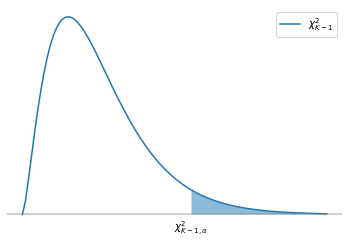

In [177]:
from scipy.stats import chi2

x = np.linspace(0, 20, 100)
dist = chi2(df=5)
y = dist.pdf(x)

fig, ax = plt.subplots()
ax.plot(x, y, label=r"$\chi^2_{K-1}$")
ax.axhline(color="gray", alpha=0.5)

alpha = 0.95
t = dist.ppf(alpha)
ax.text(t, -dist.pdf(t) * 0.7, r"$\chi^2_{K-1, \alpha}$", ha="center")
ax.fill_between(x=x[x > t], y1=y[x > t], alpha=.5)

ax.axis("off")
ax.legend()
fig.show()

:::{dropdown} （命題） $Q(\boldsymbol{X}, \boldsymbol{\pi})$は$H_0$のもとで$\chi^2_{K-1}$に収束する

（証明）

:::

### 例

日本人1000人の血液型を調べたところ、次のようになったとする。


In [248]:
import pandas as pd
from scipy.stats import multinomial, chi2
n = 1000
pi = np.array([.4, .2, .3, .1])  # 理論確率

# データの生成
m = multinomial(n=1, p=pi)
x = m.rvs(size=n, random_state=100).sum(axis=0)
d = pd.DataFrame([x], columns=["A", "B", "O", "AB"], index=["観測度数"])
d

A    B    O  AB
観測度数  371  200  337  92

日本人における血液型の割合は、おおよそＡ型40％、Ｂ型20％、Ｏ型30％、ＡＢ型10％といわれている（[一般社団法人日本血液製剤協会](http://www.ketsukyo.or.jp/glossary/a01.html)）。

これを理論確率$\boldsymbol{\pi}$とすると、期待度数（理論値）$n \times \boldsymbol{\pi}$は次のようになる

In [249]:
d.loc["期待度数", :] = pi * n
d

A      B      O     AB
観測度数  371.0  200.0  337.0   92.0
期待度数  400.0  200.0  300.0  100.0

ピアソンのカイ2乗検定統計量

$$
Q(\boldsymbol{X}, \boldsymbol{\pi})
= \sum^K_{i=1} \frac{(X_i - n\pi_i)^2}{n \pi_i}
$$

を計算すると次のようになる

In [250]:
Q = sum( (x - pi * n)**2 / (pi * n) )
Q

7.305833333333333

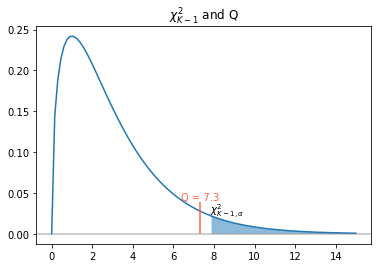

In [255]:
from scipy.stats import chi2

K = len(d.columns)
df = K - 1

x = np.linspace(0, 15, 100)
dist = chi2(df=df)
y = dist.pdf(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(color="gray", alpha=0.5)
ax.set(title=r"$\chi^2_{K-1}$ and Q")

alpha = 0.95
t = dist.ppf(alpha)
ax.text(t, dist.pdf(t) * 1.1, r"$\chi^2_{K-1, \alpha}$")
ax.fill_between(x=x[x > t], y1=y[x > t], alpha=.5)

ax.vlines(Q, 0, dist.pdf(Q) * 1.4, color="tomato")
ax.text(Q, dist.pdf(Q) * 1.5, f"Q = {Q:.1f}", ha="center", color="tomato")

fig.show()

### 独立性の検定

TODO

## 尤度比検定

尤度を用いた検定。


### 最尤推定量の漸近正規性



## ワルド検定

帰無仮説のもとでの漸近分布が正規分布で近似できるとき、それを利用して

$$
R = \{
x \in \mathcal{X} \mid |\hat{\theta} - \theta| / Var(\hat{\theta}) \geq z_{\alpha/2}
\}
$$

という棄却域を作る

## スコア検定

**スコア検定** （score test）はスコア関数

$$
S_n(\theta, \boldsymbol{X}) = \frac{d}{d \theta} \log f_n(\boldsymbol{X} \mid \theta)
$$

に基づいた検定方式である。

$$
E\left[S_n(\theta, \boldsymbol{X})\right]=0, \operatorname{Var}\left(S_n(\theta, \boldsymbol{X})\right)=I_n(\theta)=n I_1(\theta)
$$

となる。 $S_n(\theta, \boldsymbol{X})$ は i.i.d. である確率変数の和になるので, $\theta$ が真値のときの中心極限定理により


$$
S_n(\theta, \boldsymbol{X}) / \sqrt{n I_1(\theta)} \rightarrow_d \mathcal{N}(0,1)
$$

となる. $H_0: \theta=\theta_0$ vs $H_1: \theta \neq \theta_0$ に対して $S_n\left(\theta_0, \boldsymbol{X}\right) / \sqrt{n I\left(\theta_0\right)}$ に基づいた 検定が考えられる


$$
R=\left\{
    \boldsymbol{x} \in \mathcal{X}
    \left| \
        \frac{ | S_n\left(\theta_0, \boldsymbol{x}\right) | }
            { \sqrt{n I_1\left(\theta_0\right)}  }
    \geq z_{\alpha / 2}
\right\}
\right.
$$

を棄却域とする検定をスコア検定という。

## 参考文献

[信頼区間と検出力](https://unit.aist.go.jp/mcml/rg-orgp/uncertainty_lecture/confidence.html)